In [0]:
help(animate)

In [58]:
import scipy.stats
import json

def read(d,n,p=32749):
    return json.loads(open(f'data/v-d{d}n{n}p{p}.json').read())

def pl_hist(d,n,bins=100,p=32749):
    v = stats.TimeSeries(read(d,n,p))
    sigma = v.standard_deviation()
    T = RealDistribution('gaussian', sigma)
    return histogram(v, bins=bins, density=True, frame=True) + T.plot(-3*sigma, 3*sigma, color='red', thickness=2, linestyle='--')

def pl_mean(d,n,p=32749):
    w = stats.TimeSeries(read(d,n,p))
    return stats.TimeSeries([w[:i].mean() for i in range(100,len(w))]).plot(plot_points=n, frame=True)

def pl_sd(d,n,p=32749):
    w = stats.TimeSeries(read(d,n,p))
    return stats.TimeSeries([w[:i].standard_deviation() for i in range(100,len(w))]).plot(plot_points=n, frame=True)

def moment4(d,n,p=32749):
    w = stats.TimeSeries(read(d,n,p))
    return stats.TimeSeries([scipy.stats.moment(w[:i], 4) for i in range(100,len(w),100)])

def moment4normal(d, n, p=32749):
    w = stats.TimeSeries(read(d,n,p))
    m = w.mean()
    s = w.standard_deviation()
    k = stats.TimeSeries(10^6)
    k.randomize('normal', m, s)
    return scipy.stats.moment(k, 4)


def pl(d,n,p=32749):
    print(f"d={d}, numCoeffs={n}")
    print(scipy.stats.normaltest(read(d,n,p)))  # "If the p-val is very small, it means it is unlikely that the data came from a normal distribution."
    show(graphics_array([[pl_hist(d,n), pl_hist(d,n,200)], [pl_mean(d,n), pl_sd(d,n)]]), figsize=[14,6])

d=3, numCoeffs=50000
NormaltestResult(statistic=6294.089468440762, pvalue=0.0)


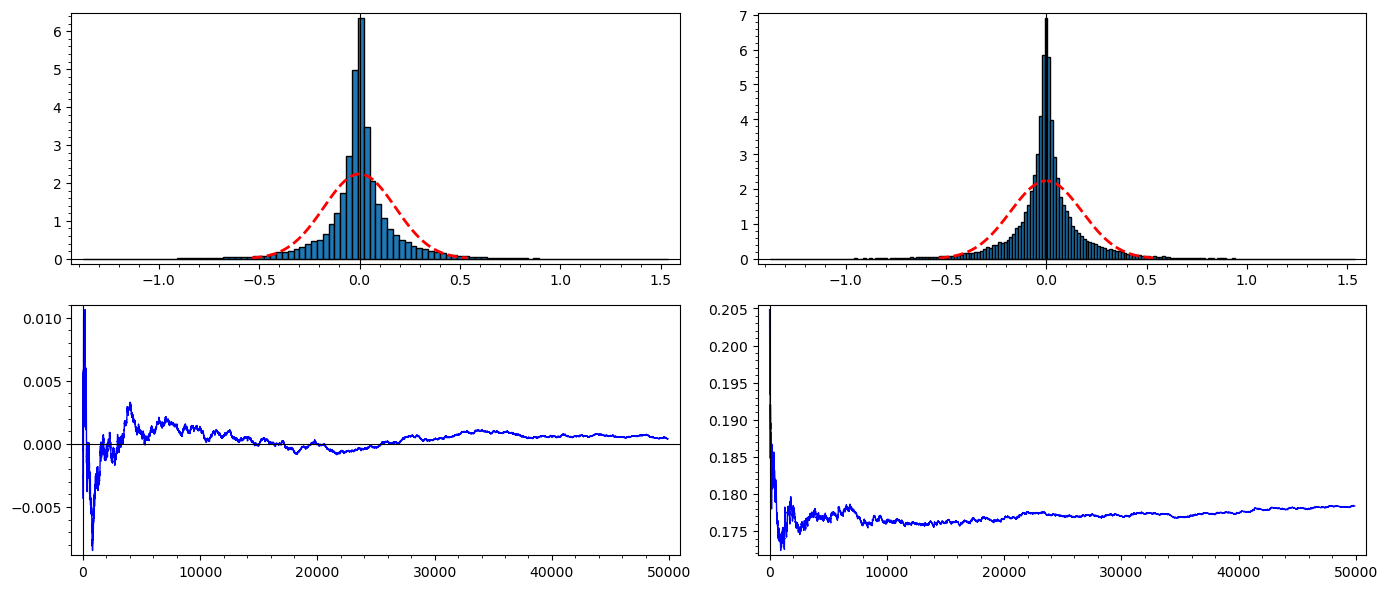

In [2]:
pl(3,50000)

d=5, numCoeffs=10000
NormaltestResult(statistic=1176.2257897861243, pvalue=3.853141977071522e-256)


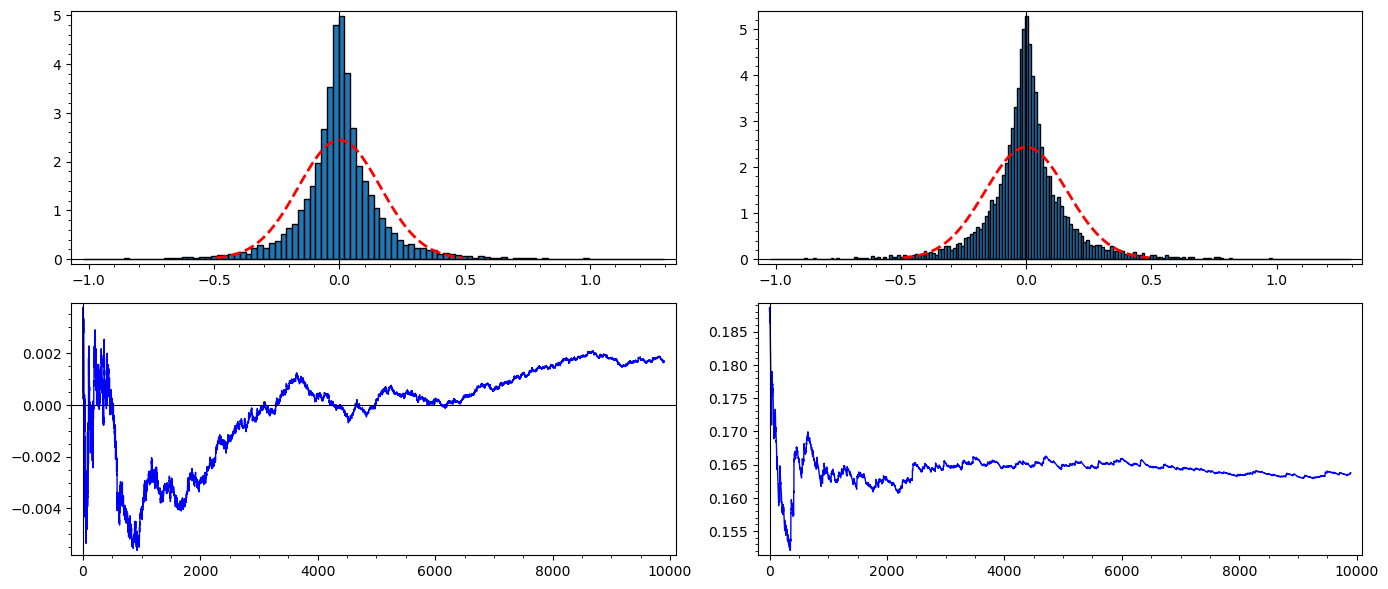

In [3]:
pl(5,10000)

d=7, numCoeffs=5000
NormaltestResult(statistic=426.5454349237923, pvalue=2.381418185666628e-93)


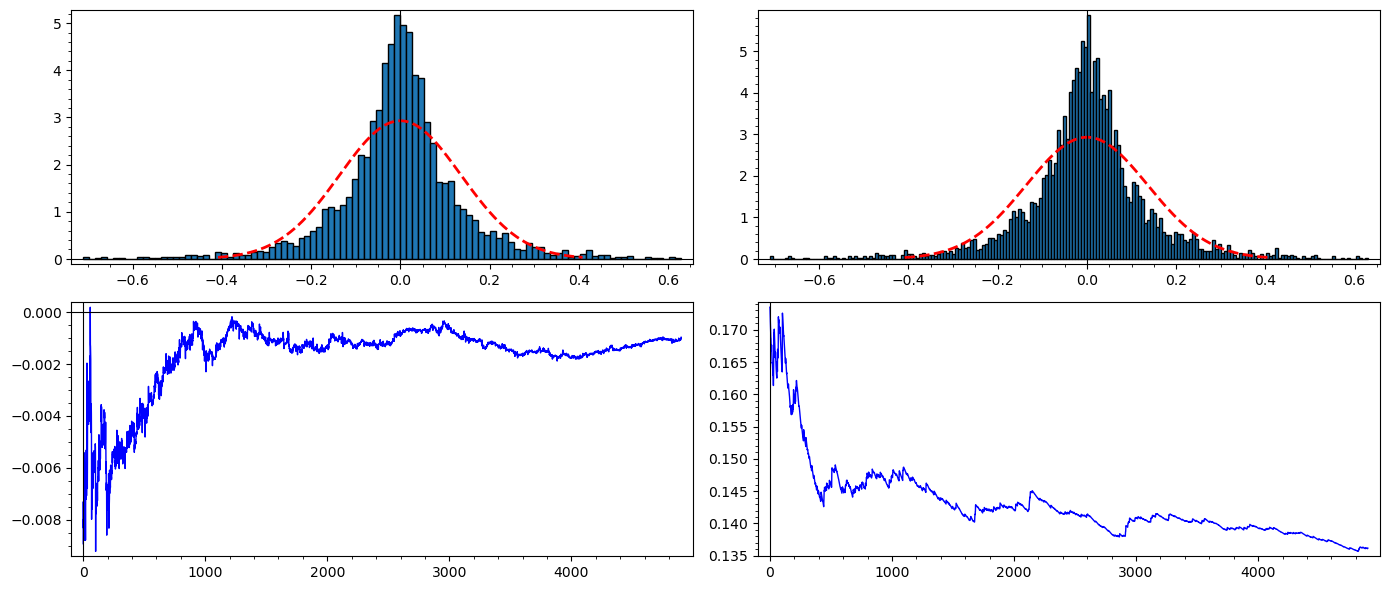

In [4]:
pl(7,5000)

d=37, numCoeffs=50000
NormaltestResult(statistic=678.8292199284144, pvalue=3.9274242304736496e-148)


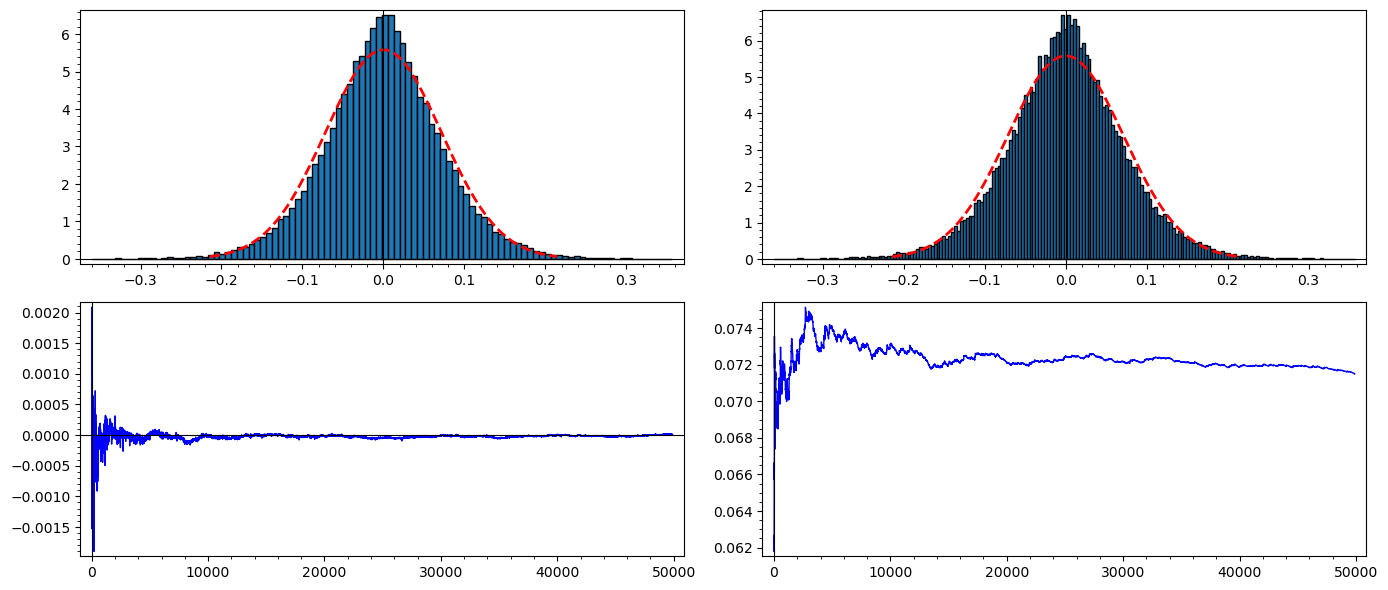

In [5]:
pl(37,50000)

d=101, numCoeffs=50000
NormaltestResult(statistic=145.2788554659887, pvalue=2.8385553489804307e-32)


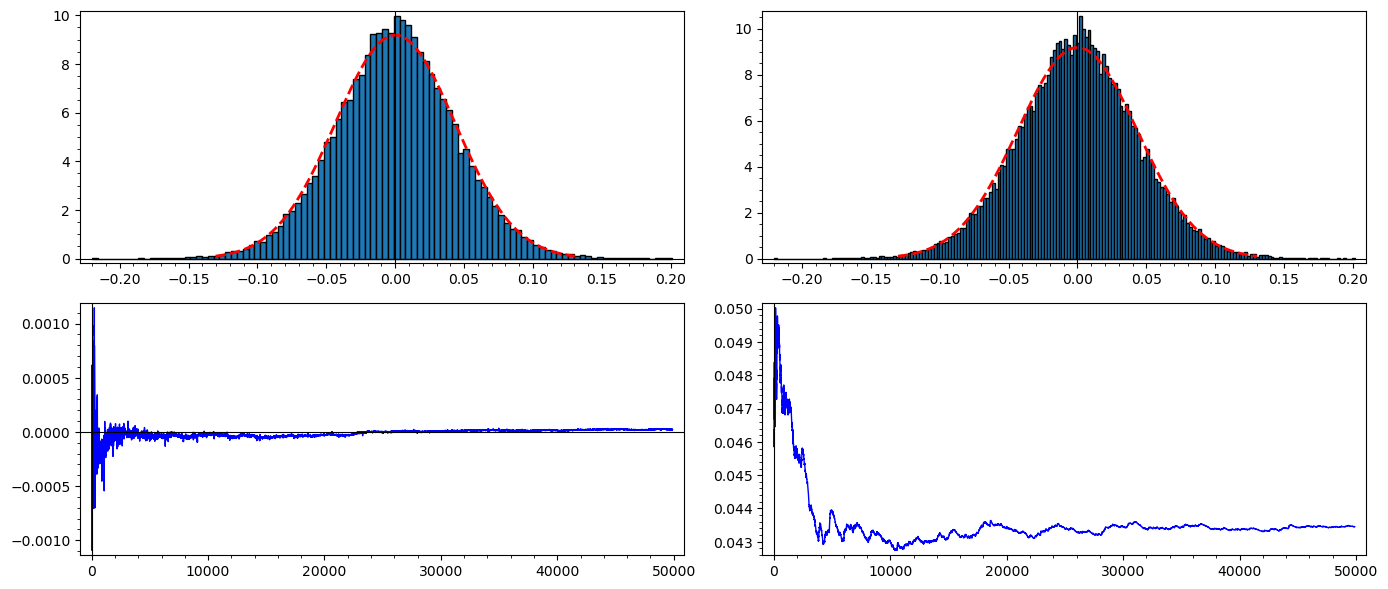

In [6]:
pl(101,50000)

d=389, numCoeffs=50000
NormaltestResult(statistic=17.02363354145368, pvalue=0.00020107817991513524)


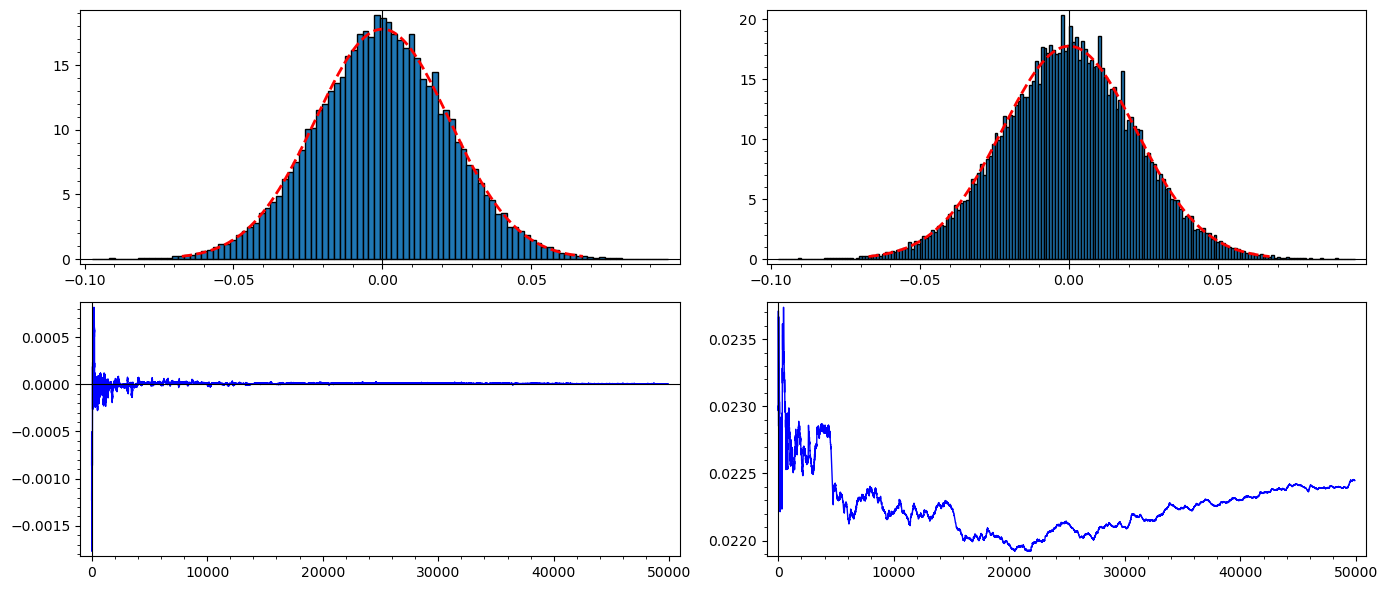

In [7]:
pl(389,50000)

d=1009, numCoeffs=50000
NormaltestResult(statistic=1.7530683719862625, pvalue=0.4162229661456852)


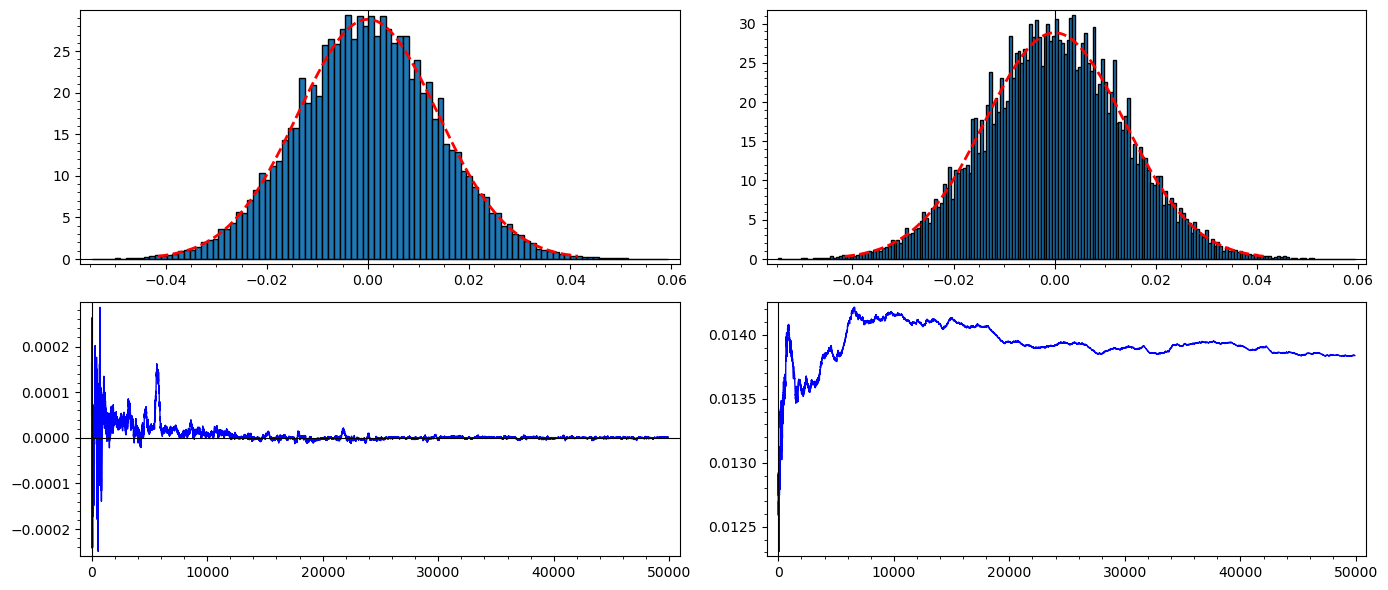

In [8]:
pl(1009,50000)

d=5077, numCoeffs=50000
NormaltestResult(statistic=0.4437291584224196, pvalue=0.8010238322692923)


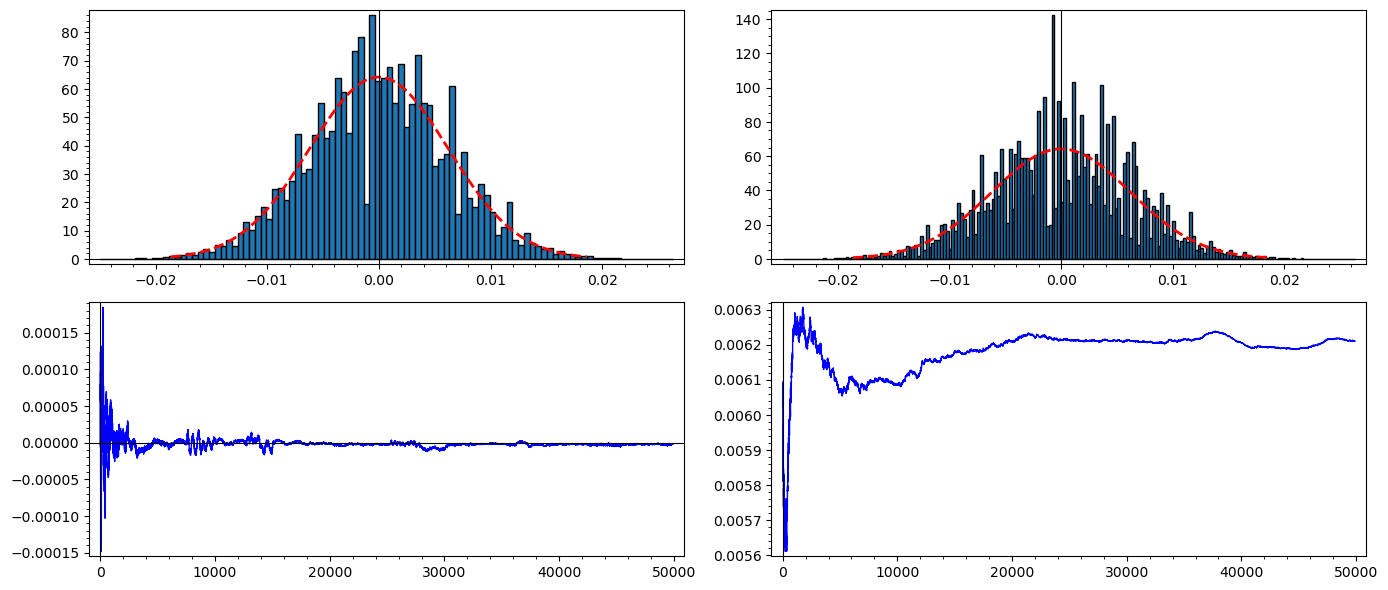

In [9]:
pl(5077,50000)

d=10007, numCoeffs=50000
NormaltestResult(statistic=0.5919164310211551, pvalue=0.7438185074474128)


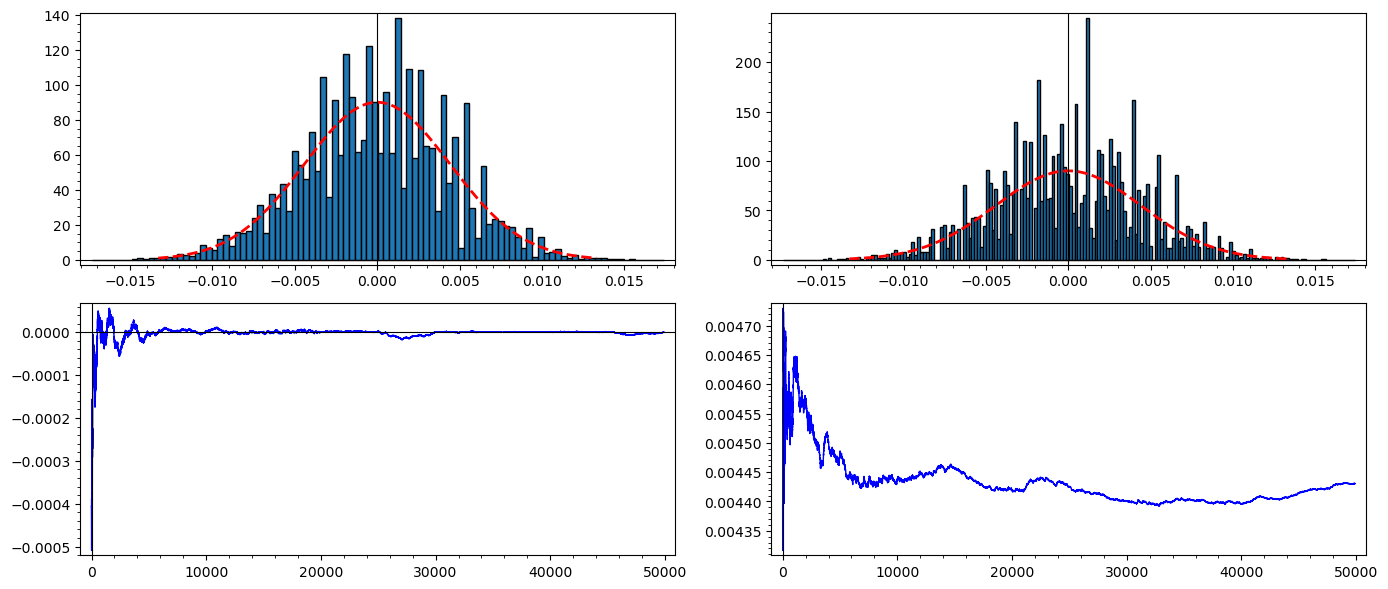

In [10]:
pl(10007,50000)

In [12]:
v = read(10007,50000)
w = stats.TimeSeries(v)
w

[-0.0018, 0.0026, -0.0061, -0.0032, -0.0047 ... -0.0038, -0.0053, 0.0058, -0.0043, -0.0009]

In [17]:
%time n = [scipy.stats.normaltest(w[:i]) for i in range(100,len(w), 100)]

CPU times: user 2.12 s, sys: 64 ms, total: 2.18 s
Wall time: 2.18 s


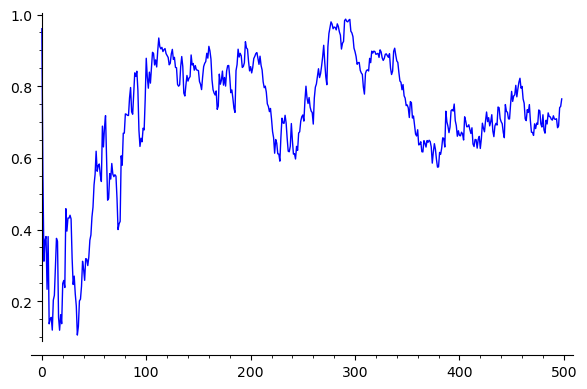

In [20]:
stats.TimeSeries([k.pvalue for k in n]).plot()

In [21]:
def normaltest(d,n):
    v = read(d,n)
    w = stats.TimeSeries(v)
    n = [scipy.stats.normaltest(w[:i]) for i in range(100,len(w), 100)]
    return stats.TimeSeries([k.pvalue for k in n])

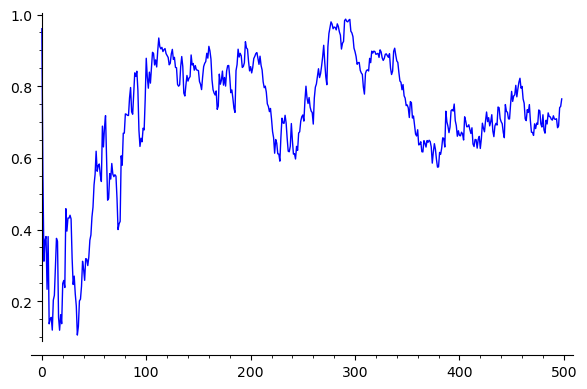

In [22]:
normaltest(10007,50000).plot()

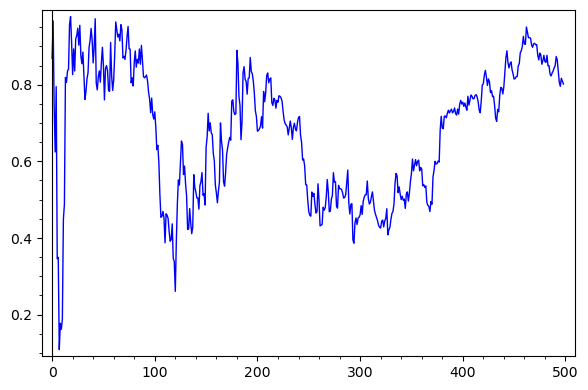

In [25]:
normaltest(5077,50000).plot(frame=True)


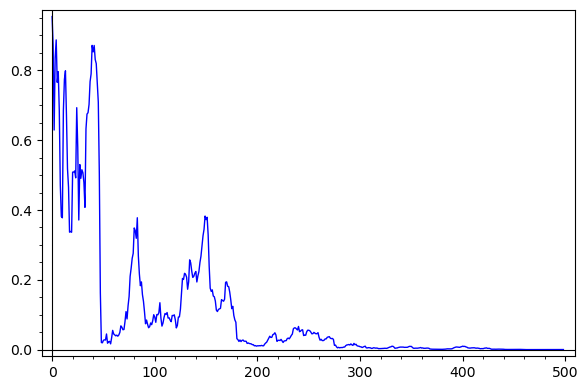

In [26]:
normaltest(389,50000).plot(frame=True)

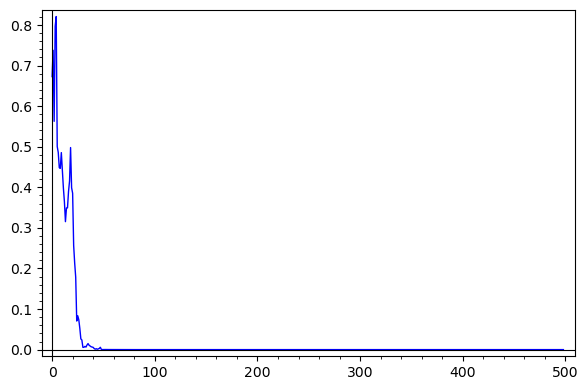

In [27]:
normaltest(101,50000).plot(frame=True)

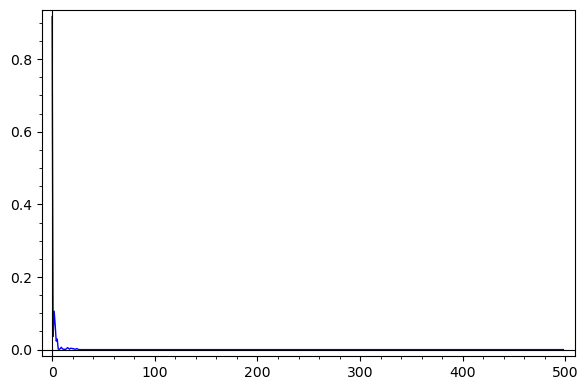

In [28]:
normaltest(37,50000).plot(frame=True)

In [43]:
v = read(37,50000)
for i in [1..6]:
    print(i, scipy.stats.moment(v, i))

1 0.0
2 0.005111264429334598
3 2.9662868700562666e-06
4 9.87885532500482e-05
5 2.0479291445787976e-07
6 3.6810704327205003e-06


In [50]:
v = moment4(3,100000);
v

[0.0061, 0.0048, 0.0047, 0.0052, 0.0050 ... 0.0098, 0.0098, 0.0098, 0.0098, 0.0098]

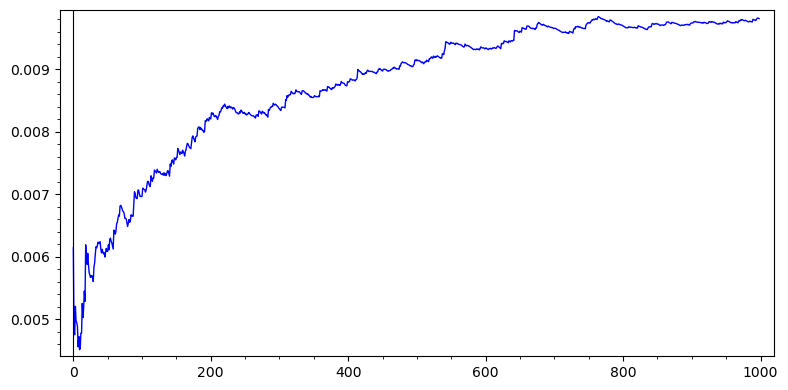

In [51]:
v.plot(frame=True, figsize=[8,4])


In [52]:
v[-1]

0.009813672854144424

In [53]:
v[0]

0.006148034775477444

In [54]:
w = stats.TimeSeries(10^6)

In [55]:
w.randomize('normal', )

<built-in method randomize of sage.stats.time_series.TimeSeries object at 0x7f1838427f60>

In [60]:
moment4normal(3,100000)

0.0029679362759499374

In [103]:
def pl_hist_animation(d,n,X=1,Y=10,bins=400,p=32749):
    v = stats.TimeSeries(read(d,n,p))
    graphs = []
    for i in [10000, 20000, .., 100000]:
        v0 = v[:i]
        sigma = v0.standard_deviation()
        T = RealDistribution('gaussian', sigma)
        graphs.append(histogram(v0, bins=bins, density=True, frame=True, axes=False, xmin=-X,xmax=X,ymin=0,ymax=Y) + T.plot(-3*sigma, 3*sigma, color='red', thickness=2, linestyle='--'))
    return graphs

In [86]:
%time graphs = pl_hist_animation(3, 100000)

CPU times: user 280 ms, sys: 16 ms, total: 296 ms
Wall time: 294 ms


Animation with 31 frames
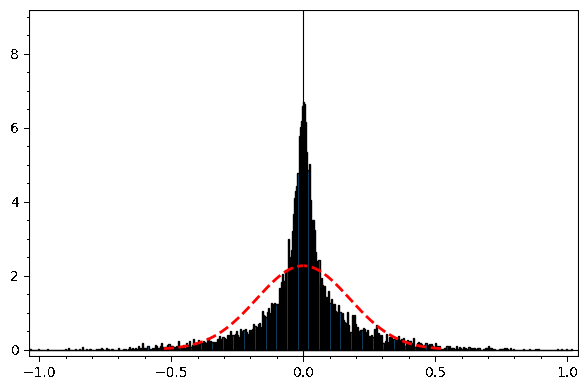

In [87]:
animate(graphs)

Animation with 31 frames
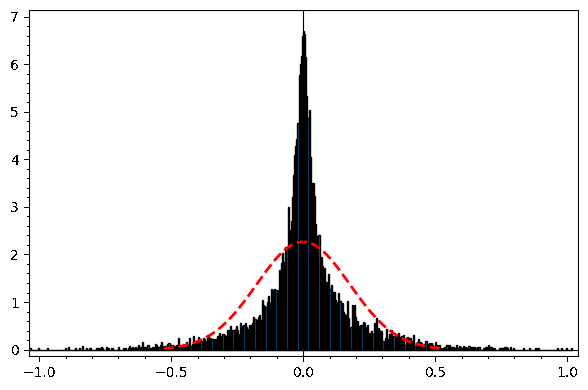

In [84]:
animate(graphs)

Animation with 19 frames
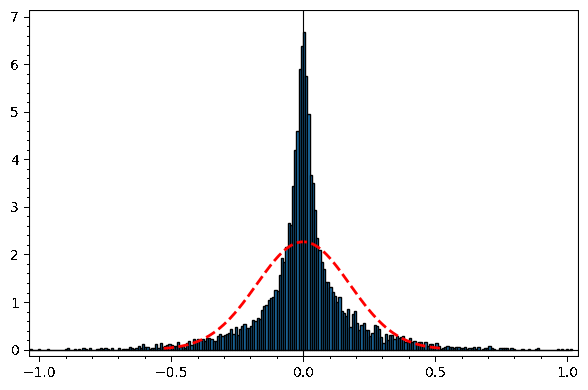

In [81]:
animate(graphs)

In [89]:
%time graphs = pl_hist_animation(11, 100000)

CPU times: user 318 ms, sys: 11.8 ms, total: 330 ms
Wall time: 329 ms


Animation with 31 frames
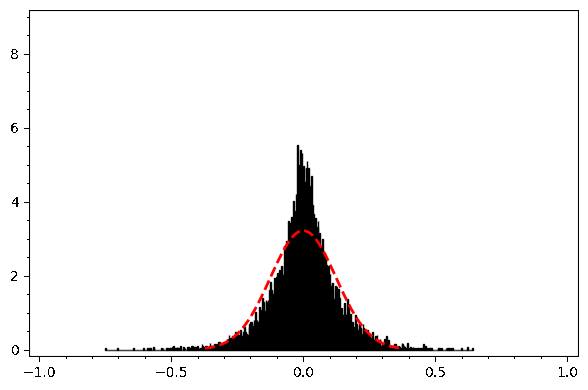

In [90]:
animate(graphs)

In [99]:
%time graphs = pl_hist_animation(101, 50000, 0.2)

CPU times: user 163 ms, sys: 25 µs, total: 163 ms
Wall time: 161 ms


Animation with 10 frames
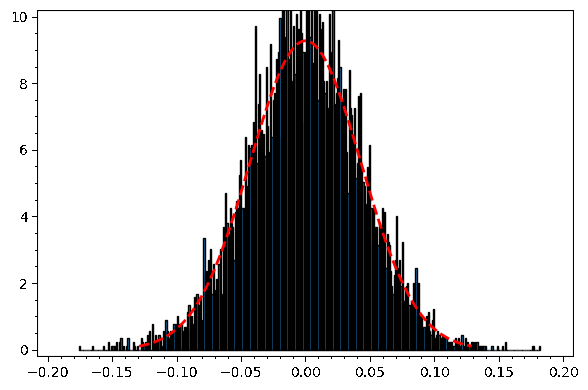

In [100]:
animate(graphs)

In [104]:
%time graphs = pl_hist_animation(5077, 50000, 0.02, 150)

CPU times: user 326 ms, sys: 8.03 ms, total: 334 ms
Wall time: 332 ms


Animation with 10 frames
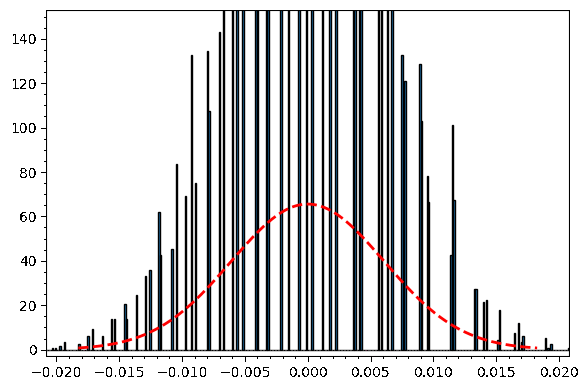

In [105]:
animate(graphs)